In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalization
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
#Build Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [4]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
)

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 13s 6ms/step - loss: 1.5121 - accuracy: 0.4525 - val_loss: 1.2552 - val_accuracy: 0.5480
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1346 - accuracy: 0.5994 - val_loss: 1.0756 - val_accuracy: 0.6240
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9782 - accuracy: 0.6568 - val_loss: 0.9674 - val_accuracy: 0.6577
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8892 - accuracy: 0.6891 - val_loss: 0.9174 - val_accuracy: 0.6833
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8130 - accuracy: 0.7158 - val_loss: 0.9209 - val_accuracy: 0.6815
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7581 - accuracy: 0.7341 - val_loss: 0.8533 - val_accuracy: 0.7096
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7108 - accuracy: 0.7527 - val_loss: 0.8894 - val_accuracy

In [5]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.2508 - accuracy: 0.7027 - 645ms/epoch - 2ms/step

Test accuracy: 0.7027000188827515


In [8]:
y_pred = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [13]:
test_labels_one_hot = to_categorical(test_labels, 10)
fpr, tpr, _ = roc_curve(test_labels_one_hot.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)

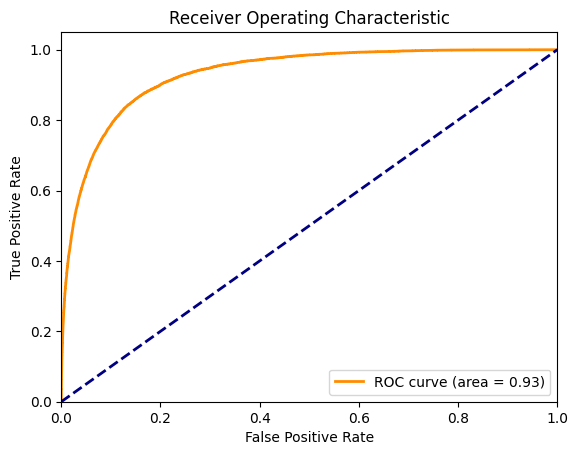

In [14]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [6]:
!pip install graphviz

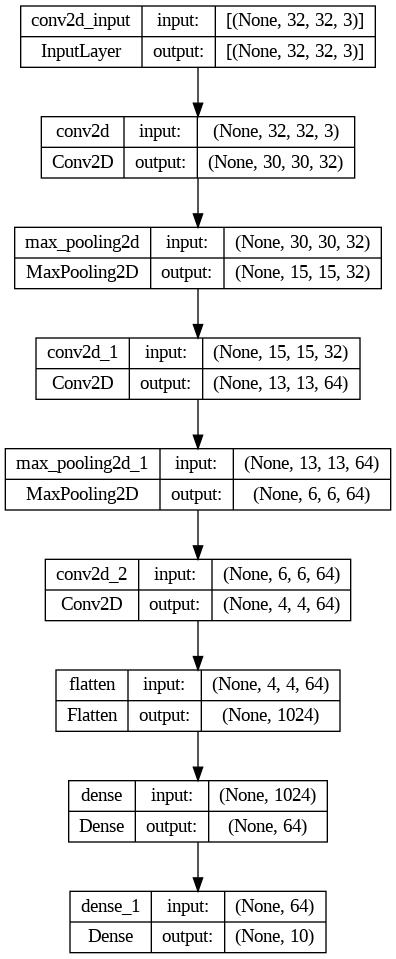

In [7]:
from tensorflow.keras.utils import plot_model
# Assuming 'model' is your CNN model
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)